## Titanic Survival Prediction
1. Titanic Survival Prediction is a classic data science project based on the Titanic
   dataset, which contains information about passengers who were on board the
   Titanic, including whether they survived or not. The goal is to build a predictive
   model that can predict whether a passenger would have survived the Titanic
   disaster based on features like age, gender, ticket class, and more.
2. This project typically involves data preprocessing, exploratory data analysis
   (EDA), feature engineering, and machine learning. You'll use algorithms like
   logistic regression, decision trees, or random forests for prediction.

### Importing All Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Importing dataset

In [2]:
df=pd.read_csv('tested.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.shape

(418, 12)

### Finding missing values in the dataset

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Observation:
1. Age and Cabin and Fare contains null/missing values from data set

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<AxesSubplot:>

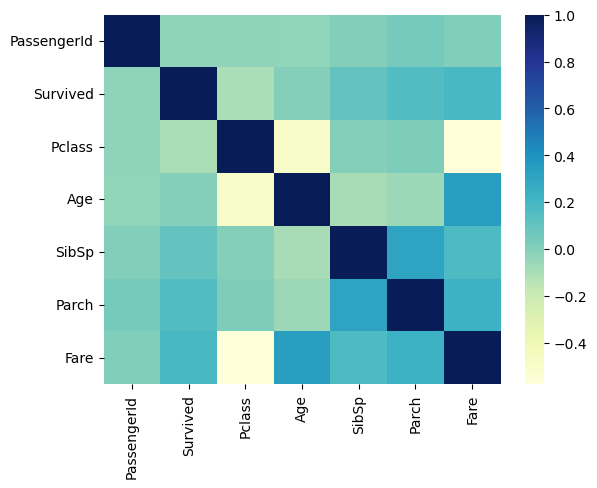

In [7]:
#Finding the Correlation of Survived with other features
#In seaborn 
sns.heatmap( df.corr() , cmap='YlGnBu')

In [8]:
#With values
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.023245,-0.026751,-0.034102,0.003818,0.043080,0.008211
Survived,-0.023245,1.000000,-0.108615,-0.000013,0.099943,0.159120,0.191514
Pclass,-0.026751,-0.108615,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.000013,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.099943,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.159120,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,0.191514,-0.577147,0.337932,0.171539,0.230046,1.000000


## Observation:
1. Pclass and Age show high correlation which helps in dealing with missing values of age

In [9]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
#Droping Name as it has no realtion with survived
df.drop('Name',axis=1,inplace=True)

In [11]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [13]:
#Lets Convert Categorical Data to numerical
#Sex can be converted as Male as 1 and Female as 0 by using map
df['Sex']=df['Sex'].map({'male':1,'female':0})

In [14]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,1,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,0,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,1,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,1,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,0,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
df['Sex'].value_counts()

1    266
0    152
Name: Sex, dtype: int64

In [16]:
df['Cabin'].value_counts()

B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: Cabin, Length: 76, dtype: int64

In [17]:
df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [18]:
df['Embarked']=df['Embarked'].map({'S':0,'C':1,'Q':2})

In [19]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,1,34.5,0,0,330911,7.8292,NaN,2
1,893,1,3,0,47.0,1,0,363272,7.0000,NaN,0
2,894,0,2,1,62.0,0,0,240276,9.6875,NaN,2
3,895,0,3,1,27.0,0,0,315154,8.6625,NaN,0
4,896,1,3,0,22.0,1,1,3101298,12.2875,NaN,0


In [20]:
df['Sex'].astype(int)

0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 418, dtype: int32

In [21]:
df['Embarked'].astype(int)

0      2
1      0
2      2
3      0
4      0
      ..
413    0
414    1
415    0
416    0
417    1
Name: Embarked, Length: 418, dtype: int32

In [22]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int64
dtype: object

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    int64  
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 36.0+ KB


<AxesSubplot:xlabel='Age', ylabel='count'>

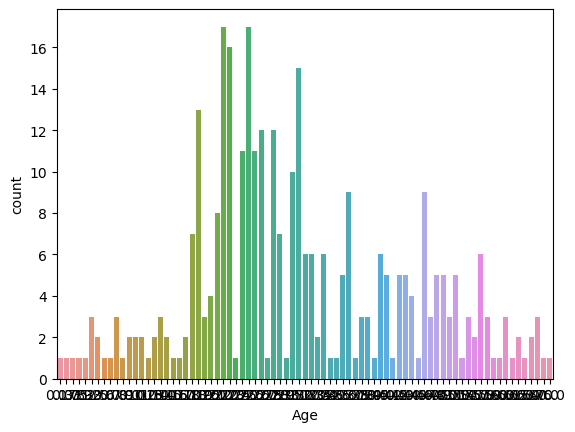

In [24]:
sns.countplot(data=df,x='Age')

C:\Users\VishalChavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

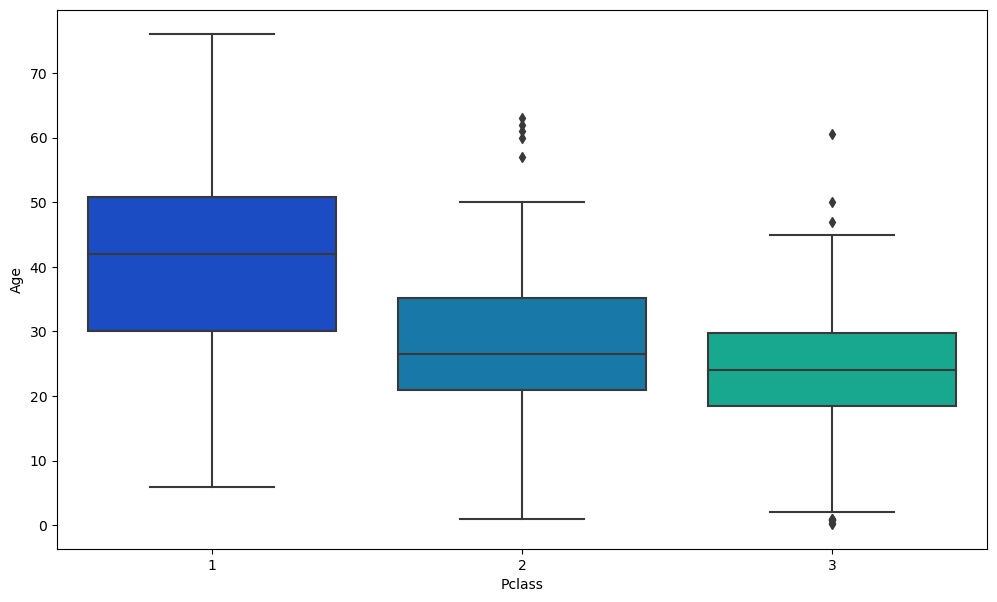

In [25]:
plt.figure(figsize=(12,7))
sns.boxplot('Pclass','Age',data=df,palette='winter')

## Observation:
1. The Agv age based on Pclass are 42, 26, 23

In [26]:
def upd_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 42
        elif Pclass==2:
            return 26
        else:
            return 23
    else:
        return Age

In [27]:
df['Age']=df[['Age','Pclass']].apply(upd_age,axis=1)

In [28]:
#Droping Cabin and Ticket
df.drop(['Ticket','Cabin'],inplace=True,axis=1)

In [29]:
#Droping PassengerId
df.drop('PassengerId',inplace=True,axis=1)

In [30]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,2
1,1,3,0,47.0,1,0,7.0000,0
2,0,2,1,62.0,0,0,9.6875,2
3,0,3,1,27.0,0,0,8.6625,0
4,1,3,0,22.0,1,1,12.2875,0


In [31]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [32]:
#As only one value is missing we can update it by its mean value for fare
df['Fare']=df['Fare'].fillna(df['Fare'].mean())

In [33]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [34]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

In [35]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,2
1,1,3,0,47.0,1,0,7.0000,0
2,0,2,1,62.0,0,0,9.6875,2
3,0,3,1,27.0,0,0,8.6625,0
4,1,3,0,22.0,1,1,12.2875,0


In [36]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [37]:
#spliting the data
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
X= df.drop(['Survived'], axis=1)
#y= df.iloc[:,1]
y=df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=101)

In [38]:
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [39]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

## Model Building

In [40]:
lr = LogisticRegression()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()

lr.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
dt.fit(X_train_scaled, y_train)

lr_pred = lr.predict(X_test_scaled)
rf_pred = rf.predict(X_test_scaled)
dt_pred = dt.predict(X_test_scaled)

### Model Evaluation

In [41]:
# Evaluating the models by generating classification report and cross validation scores

lr_report = classification_report(y_test, lr_pred)
lr_scores = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='accuracy')

rf_report = classification_report(y_test, rf_pred)
rf_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='accuracy')

dt_report = classification_report(y_test, dt_pred)
dt_scores = cross_val_score(dt, X_train_scaled, y_train, cv=5, scoring='accuracy')


print('The classification report of Logistic Regression is below : ', '\n\n\n', lr_report)
print(f"Logistic Regression Mean Cross-Validation Score: {lr_scores}")
print('\n\n')
print('The classification report of Random Forest is below : ', '\n\n\n', rf_report)
print(f"Random Forest Mean Cross-Validation Score: {rf_scores}")

print('\n\n')
print('The classification report of Decision Tree Classifier is below : ', '\n\n\n', dt_report)
print(f"Decision Tree Classifier Mean Cross-Validation Score: {dt_scores}")

The classification report of Logistic Regression is below :  


               precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        55

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

Logistic Regression Mean Cross-Validation Score: [1. 1. 1. 1. 1.]



The classification report of Random Forest is below :  


               precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        55

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

Random Forest Mean Cross-Validation Score: [1. 1. 1. 1. 1.]



The classification report of Decision Tree Classifier is below :  


               precis